# CAR PRICE PREDICTION
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase

# Data Collection Phase
You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. more the data better the model In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.) You need web scraping for this. You have to fetch data for different locations. The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data. Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback. Note – The data which you are collecting is important to us. Kindly don’t share it on any public platforms.

# Model Building Phase

After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like.

Data Cleaning

Exploratory Data Analysis

Data Pre-processing

Model Building

Model Evaluation

Selecting the best model

In [382]:
#lets Load the dataset and required libraries..

In [305]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

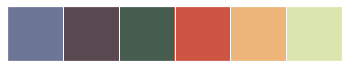

In [306]:
# Color Palettes
colors = ["#6D7696", "#59484F", "#455C4F", "#CC5543", "#EDB579", "#DBE6AF"]
sns.palplot(sns.color_palette(colors))

In [307]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")


In [362]:
df=pd.read_excel('CarData7000.xlsx')
df.shape

(6755, 9)

In [363]:
df

Unnamed: 0                         Name of car              Model  \
0              0                                   -                  -   
1              1                Hyundai Xcent (2014)         1.2 VTVT S   
2              2       Maruti Suzuki Alto 800 (2017)                LXI   
3              3               Chevrolet Beat (2010)                 LS   
4              4                                   -                  -   
...          ...                                 ...                ...   
6750        6750                   Honda City (2019)  V Automatic (AVN)   
6751        6751        Maruti Suzuki Celerio (2015)      2014-2017 ZDi   
6752        6752  Maruti Suzuki Vitara Brezza (2017)         VDi Option   
6753        6753               Hyundai Santro (2005)   GLS II - Euro II   
6754        6754                 Toyota Etios (2012)             1.4 GD   

        Fuel Owner   Location      KM    Varient     Price  
0          -     -  TamilNadu      --         --         -  
1     PETROL   2nd  TamilNadu  107440     MANUAL  3,85,000  
2     PETROL   1st  TamilNadu   23000     MANUAL  3,30,000  
3     PETROL   1st  TamilNadu   68555     MANUAL  2,05,000  
4          -     -  TamilNadu      --         --         -  
...      ...   ...        ...     ...        ...       ...  
6750  PETROL   1st     Punjab   19000  AUTOMATIC  9,85,000  
6751  DIESEL   1st     Punjab   45000     MANUAL  3,00,000  
6752  DIESEL   1st     Punjab   45000     MANUAL  7,90,000  
6753  PETROL   1st     Punjab  113500     MANUAL    93,500  
6754  DIESEL   2nd     Punjab   90000     MANUAL  3,95,000  

[6755 rows x 9 columns]

# DataSet Attributions:

These attributes helps to understand feature columns easily.

1. Name of the car--> this feature column includes brand name and name of car know in the market.

2. Model --> this feature column is very importand and this feature column gives the model of the information this feature columns makes price higher or lower.

3. fuel--> this is self understanding feature column.

4. Owner --> this is self understanding feature column more the no lesser the price.

5. KM--> this feature column is all about km driven by the owner before selling in the market.

6. Varient--> in india 2 varients are there manual or automatic, luxury cars are comes in automatic segments.

7. Price --> this is our target column as well, this feature column is all about the demand of the car in the market.


Here we can easily se that price attribute defines the price of the Car and also the output variable.;and rest of the variables are input variables.

# 1.Data Cleaning

In [365]:
# Remove the S.no and location  from data set, as they are not unique for each row and hence not useful for the model
df.drop(['Unnamed: 0'], axis=1, inplace=True)
#df.drop(['Location'], axis=1, inplace=True)
df.shape

(6755, 8)

# 2. Exploratory Data Analysis
In choosing the right features to feed into our model, we want to capture the input variables most strongly related to the target variable.

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6755 entries, 0 to 6754
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name of car  6755 non-null   object
 1   Model        6451 non-null   object
 2   Fuel         6755 non-null   object
 3   Owner        6755 non-null   object
 4   Location     6755 non-null   object
 5   KM           6755 non-null   object
 6   Varient      6755 non-null   object
 7   Price        6755 non-null   object
dtypes: object(8)
memory usage: 422.3+ KB


# Observations:
    
1.From above code we observe that there are lots of null values present in the data set.

2. Data is object type so first we have to convert it into int type.

In [367]:
df.shape

(6755, 8)

In [368]:
df.columns

Index(['Name of car', 'Model', 'Fuel', 'Owner', 'Location', 'KM', 'Varient',
       'Price'],
      dtype='object')

In [369]:
df.dtypes

Name of car    object
Model          object
Fuel           object
Owner          object
Location       object
KM             object
Varient        object
Price          object
dtype: object

In [370]:
df.Price.value_counts()

-            238
3,25,000      85
2,25,000      84
3,50,000      82
5,50,000      82
            ... 
4,44,999       1
5,96,000       1
9,78,000       1
2,52,000       1
16,35,000      1
Name: Price, Length: 945, dtype: int64

In [371]:
df.Location.value_counts()

BENGALURU       997
Bhopal          960
WEST Bengal     946
TamilNadu       907
Punjab          506
Haryana         500
DELHI           493
Gujrat          487
kerela          480
UttarPradesh    479
Name: Location, dtype: int64

In [372]:
df.Fuel.value_counts()

DIESEL                           3290
PETROL                           2882
-                                 238
CNG & HYBRIDS                     203
LPG                                62
--                                 45
CNG                                26
ELECTRIC                            8
PETROL/COMPRESSED NATURAL GAS       1
Name: Fuel, dtype: int64

In [373]:
df.Owner.value_counts()

1st       3687
2nd       1781
3rd        409
-          238
--         196
First      127
4th         99
Second      98
Third       58
4+          45
Fourth      17
Name: Owner, dtype: int64

In [374]:
df.KM.value_counts()

--        238
70000     167
90000     164
80000     159
65000     130
         ... 
34521       1
85230       1
46321       1
11507       1
103400      1
Name: KM, Length: 1502, dtype: int64

In [375]:
df.Varient.value_counts()

MANUAL       5213
AUTOMATIC    1101
--            441
Name: Varient, dtype: int64

# There ara many different caracters are present in our data set,we have to first convert them into nan values.

In [376]:
df=df.replace(r'--', np.nan, regex=True)

In [377]:
df=df.replace(r'-', np.nan, regex=True)

In [378]:
df.head(15)

Name of car                    Model    Fuel Owner  \
0                               NaN                      NaN     NaN   NaN   
1              Hyundai Xcent (2014)               1.2 VTVT S  PETROL   2nd   
2     Maruti Suzuki Alto 800 (2017)                      LXI  PETROL   1st   
3             Chevrolet Beat (2010)                       LS  PETROL   1st   
4                               NaN                      NaN     NaN   NaN   
5       Maruti Suzuki Baleno (2018)                1.2 Alpha  PETROL   1st   
6               Toyota Etios (2012)                   GD SP*  DIESEL   1st   
7            Volkswagen Polo (2012)  COMFORTLINE 1.2L DIESEL  DIESEL   3rd   
8         Maruti Suzuki Alto (2007)                       LX     LPG   1st   
9        Hyundai Santro Xing (2004)                      GLS  PETROL   2nd   
10               Hyundai I10 (2008)                      Era  PETROL   1st   
11            Hyundai Santro (2004)                   Others  PETROL   2nd   
12          Mahindra Scorpio (2012)                      NaN  DIESEL   1st   
13                 Ford Ikon (2003)              1.8 ZXi NXt  DIESEL   2nd   
14  Maruti Suzuki Zen Estilo (2010)                  LX BSIV  PETROL   1st   

     Location        KM Varient     Price  
0   TamilNadu       NaN     NaN       NaN  
1   TamilNadu  107440.0  MANUAL  3,85,000  
2   TamilNadu   23000.0  MANUAL  3,30,000  
3   TamilNadu   68555.0  MANUAL  2,05,000  
4   TamilNadu       NaN     NaN       NaN  
5   TamilNadu   23000.0  MANUAL  6,90,000  
6   TamilNadu  119000.0  MANUAL  5,25,000  
7   TamilNadu  101000.0  MANUAL  3,20,000  
8   TamilNadu  114000.0  MANUAL  1,50,000  
9   TamilNadu   90000.0  MANUAL  1,25,000  
10  TamilNadu  118000.0  MANUAL  2,25,000  
11  TamilNadu   66000.0  MANUAL  1,75,000  
12  TamilNadu  135000.0  MANUAL  6,20,000  
13  TamilNadu   60000.0  MANUAL    99,999  
14  TamilNadu   57500.0  MANUAL  2,15,000

# Missing Values

In [379]:
df.isnull().sum()

Name of car     451
Model          1913
Fuel            283
Owner           434
Location          0
KM              238
Varient         441
Price           238
dtype: int64

<AxesSubplot:>

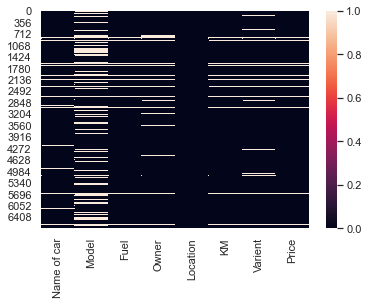

In [380]:
import seaborn as sns
sns.heatmap(df.isnull())

# Observations:
    
1.From above code we observe that there are lots of white spots which are null values in the dataset..

2. we have to understand the missing values and fill with proper values or drop them permanantly.

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6755 entries, 0 to 6754
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name of car  6304 non-null   object 
 1   Model        4842 non-null   object 
 2   Fuel         6472 non-null   object 
 3   Owner        6321 non-null   object 
 4   Location     6755 non-null   object 
 5   KM           6517 non-null   float64
 6   Varient      6314 non-null   object 
 7   Price        6517 non-null   object 
dtypes: float64(1), object(7)
memory usage: 422.3+ KB


# As values are mixed its better to drop null values.

In [382]:
df=df.dropna()

<AxesSubplot:>

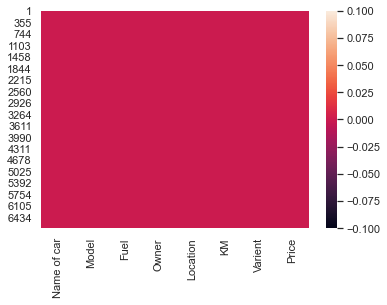

In [383]:
import seaborn as sns
sns.heatmap(df.isnull())

# Observations:
    1. As from above heat map plotting we can easily see that no null values are present in the dataset.

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4488 entries, 1 to 6754
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name of car  4488 non-null   object 
 1   Model        4488 non-null   object 
 2   Fuel         4488 non-null   object 
 3   Owner        4488 non-null   object 
 4   Location     4488 non-null   object 
 5   KM           4488 non-null   float64
 6   Varient      4488 non-null   object 
 7   Price        4488 non-null   object 
dtypes: float64(1), object(7)
memory usage: 315.6+ KB


# Observations:
    
    1. Price column is object type so we need to convert its type from object to int type.

In [385]:
x = df['Price']
y = pd.Series(x).astype('str').str.replace(',','')
y = pd.Series(y).astype('str').str.replace('\.0*','')
print(y.astype('int'))
df['Price'] = y.astype('int')

1        385000
2        330000
3        205000
5        690000
6        525000
         ...   
6748     415000
6749    1875000
6750     985000
6752     790000
6754     395000
Name: Price, Length: 4488, dtype: int32


In [386]:
x = df['Price']
y = pd.Series(x).astype('str').str.replace(',','')
y = pd.Series(y).astype('str').str.replace('\.0*','')
print(y.astype('int'))
df['Price'] = y.astype('int')

1        385000
2        330000
3        205000
5        690000
6        525000
         ...   
6748     415000
6749    1875000
6750     985000
6752     790000
6754     395000
Name: Price, Length: 4488, dtype: int32


In [387]:
x = df['Name of car']
y = pd.Series(x).astype('str').str.replace('()','')
y = pd.Series(y).astype('str').str.replace('\.0*','')
print(y.astype('str'))
df['Name of car'] = y.astype('str')

1                     Hyundai Xcent (2014)
2            Maruti Suzuki Alto 800 (2017)
3                    Chevrolet Beat (2010)
5              Maruti Suzuki Baleno (2018)
6                      Toyota Etios (2012)
                       ...                
6748      Maruti Suzuki Swift Dzire (2012)
6749               Mahindra Scorpio (2020)
6750                     Honda City (2019)
6752    Maruti Suzuki Vitara Brezza (2017)
6754                   Toyota Etios (2012)
Name: Name of car, Length: 4488, dtype: object


In [388]:
x = df['Model']
y = pd.Series(x).astype('str').str.replace('()','')
y = pd.Series(y).astype('str').str.replace('\.0*','')
print(y.astype('str'))
df['Model'] = y.astype('str')

1               12 VTVT S
2                     LXI
3                      LS
5                12 Alpha
6                  GD SP*
              ...        
6748                  VDI
6749                  S11
6750    V Automatic (AVN)
6752           VDi Option
6754                14 GD
Name: Model, Length: 4488, dtype: object


In [389]:
x = df['Fuel']
y = pd.Series(x).astype('str').str.replace('()','')
y = pd.Series(y).astype('str').str.replace('\.0*','')
print(y.astype('str'))
df['Fuel'] = y.astype('str')

1       PETROL
2       PETROL
3       PETROL
5       PETROL
6       DIESEL
         ...  
6748    DIESEL
6749    DIESEL
6750    PETROL
6752    DIESEL
6754    DIESEL
Name: Fuel, Length: 4488, dtype: object


In [390]:
x = df['Owner']
y = pd.Series(x).astype('str').str.replace('()','')
y = pd.Series(y).astype('str').str.replace('\.0*','')
print(y.astype('str'))
df['Owner'] = y.astype('str')

1       2nd
2       1st
3       1st
5       1st
6       1st
       ... 
6748    1st
6749    1st
6750    1st
6752    1st
6754    2nd
Name: Owner, Length: 4488, dtype: object


In [391]:
x = df['Varient']
y = pd.Series(x).astype('str').str.replace('()','')
y = pd.Series(y).astype('str').str.replace('\.0*','')
print(y.astype('str'))
df['Varient'] = y.astype('str')

1          MANUAL
2          MANUAL
3          MANUAL
5          MANUAL
6          MANUAL
          ...    
6748       MANUAL
6749       MANUAL
6750    AUTOMATIC
6752       MANUAL
6754       MANUAL
Name: Varient, Length: 4488, dtype: object


In [392]:
df.Varient.value_counts()

MANUAL       3748
AUTOMATIC     740
Name: Varient, dtype: int64

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4488 entries, 1 to 6754
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name of car  4488 non-null   object 
 1   Model        4488 non-null   object 
 2   Fuel         4488 non-null   object 
 3   Owner        4488 non-null   object 
 4   Location     4488 non-null   object 
 5   KM           4488 non-null   float64
 6   Varient      4488 non-null   object 
 7   Price        4488 non-null   int32  
dtypes: float64(1), int32(1), object(6)
memory usage: 298.0+ KB


sucessfull we convert the type of Price attribute from object to int.

The Goal:

1.Each row in the dataset describes the characteristics of a Car.

2.Our goal is to predict the Price,  from given these features.

# Univeriate Analysis

Ploting of distribution plots of feature columns :
    

# Price
1.The variable we're trying to predict.

225000     58
250000     58
550000     57
350000     57
325000     57
           ..
242000      1
594300      1
1520000     1
2751000     1
1599501     1
Name: Price, Length: 765, dtype: int64

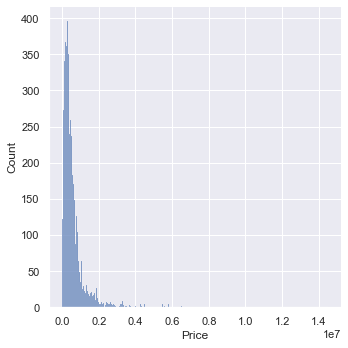

In [394]:
sns.displot(df['Price'])
df.Price.value_counts()

Observations:
    
    1. data is not distributed normally.
    
    2. data is skewed towards right.
    
    3. most of the car prices are fall under 5 lakh.

225000     58
250000     58
550000     57
350000     57
325000     57
           ..
242000      1
594300      1
1520000     1
2751000     1
1599501     1
Name: Price, Length: 765, dtype: int64

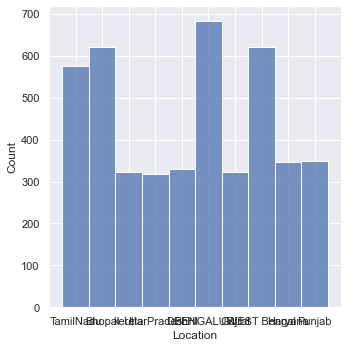

In [395]:
sns.displot(df['Location'])
df.Price.value_counts()

80000.0     108
90000.0     105
70000.0      99
65000.0      91
55000.0      82
           ... 
67200.0       1
100990.0      1
39536.0       1
16543.0       1
102400.0      1
Name: KM, Length: 1105, dtype: int64

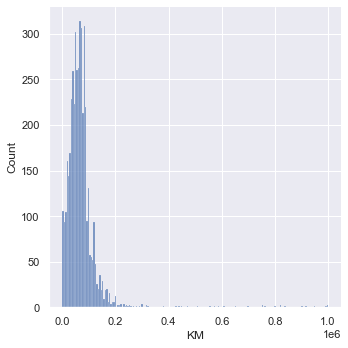

In [396]:
sns.displot(df['KM'])
df.KM.value_counts()

1st       2741
2nd       1207
3rd        268
First       77
4th         70
Second      50
4+          33
Third       32
Fourth      10
Name: Owner, dtype: int64

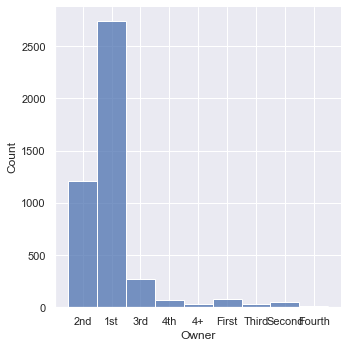

In [397]:
sns.displot(df['Owner'])
df.Owner.value_counts()

80000.0     108
90000.0     105
70000.0      99
65000.0      91
55000.0      82
           ... 
67200.0       1
100990.0      1
39536.0       1
16543.0       1
102400.0      1
Name: KM, Length: 1105, dtype: int64

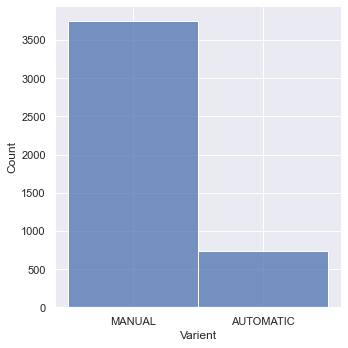

In [398]:
sns.displot(df['Varient'])
df.KM.value_counts()

VXI                    209
Others                 195
VDI                    163
LXI                    146
LXi                     61
                      ... 
First Edition 3 TD6      1
ZXI AT Petrol            1
2 TFSI Premium Plus      1
2 L Diesel LX            1
Non AC eRLX Euro II      1
Name: Model, Length: 1201, dtype: int64

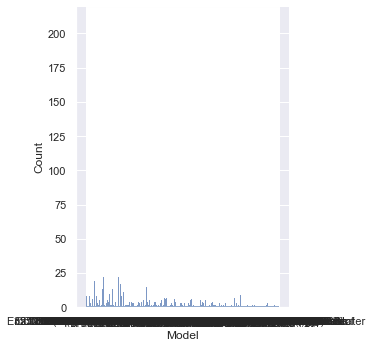

In [399]:
sns.displot(df['Model'])
df.Model.value_counts()

80000.0     108
90000.0     105
70000.0      99
65000.0      91
55000.0      82
           ... 
67200.0       1
100990.0      1
39536.0       1
16543.0       1
102400.0      1
Name: KM, Length: 1105, dtype: int64

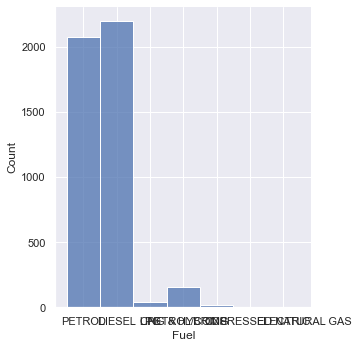

In [400]:
sns.displot(df['Fuel'])
df.KM.value_counts()

Observations:
    
    1. Data is skewed.
    
    2. Data is not normally distributed.
    
    3. classes are not equal.

# Biveriate analysis for better understanding which feature columns are impacting more on Predicting Prices.

VisualLization with taget variable.

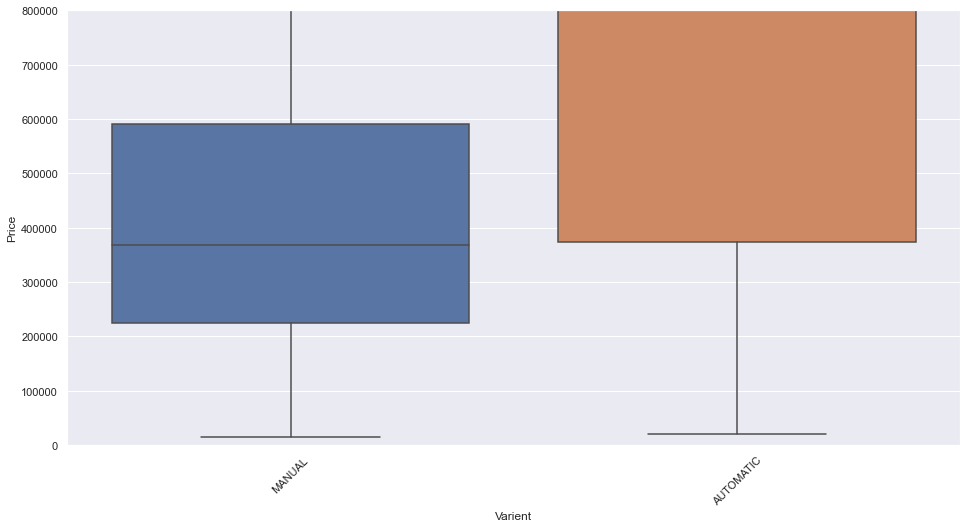

In [401]:
data = pd.concat([df['Price'], df['Varient']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=df['Varient'], y="Price", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);
sns.set(font_scale=1.2)

Observations:
    
    1. Classes are not equal.
    
    2. Both the segments having different price bands, automatic vechiles are more expencive then manual transmission. 

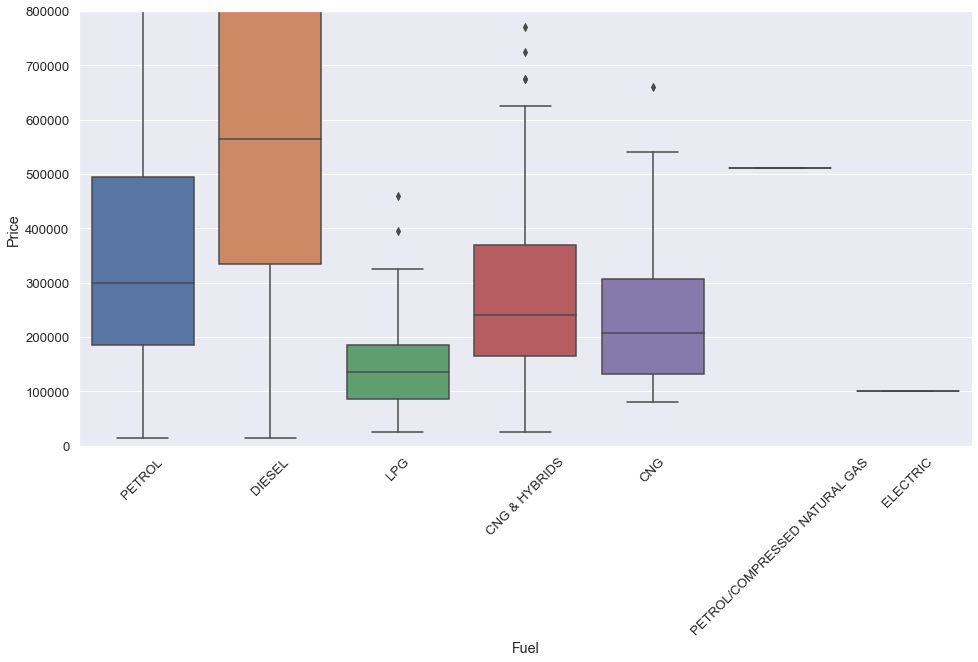

In [402]:
data = pd.concat([df['Price'], df['Fuel']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=df['Fuel'], y="Price", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);
sns.set(font_scale=1.2)

Observations:
    
    1. Diesel car having more price range.
    
    2. petrol vechiles on 2nd spot in price range.
    
    3. cng and hybrids cars are on 3rd spot in price range.

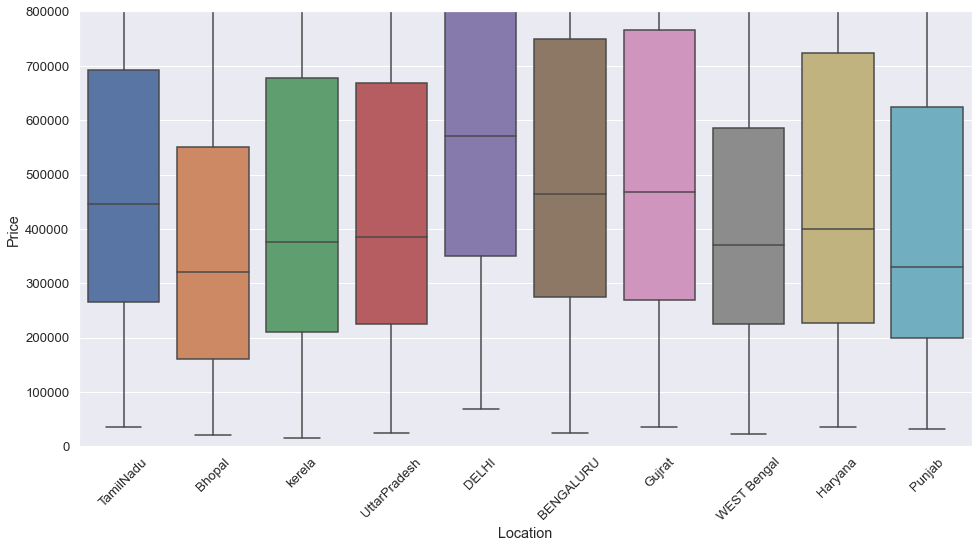

In [403]:
data = pd.concat([df['Price'], df['Location']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=df['Location'], y="Price", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);
sns.set(font_scale=1.2)

In [404]:
import plotly.express as px
fig = px.histogram(df, 
                   x='Price', 
                   marginal='box', 
                   color='Owner', 
                   color_discrete_sequence=['green', 'grey','red','orange','blue','blueviolet', 'brown', 'burlywood', 'chocolate', 'darkblue','olive','pink'], 
                   title='Price with Owner')
fig.update_layout(bargap=0.1)
fig.show()

In [405]:
import plotly.express as px
fig = px.histogram(df, 
                   x='Price', 
                   marginal='box', 
                   color='Fuel', 
                   color_discrete_sequence=['green', 'grey','red','orange','blue','blueviolet', 'brown', 'burlywood', 'chocolate', 'darkblue','olive','pink'], 
                   title='Price comparision with fuel options.')
fig.update_layout(bargap=0.1)
fig.show()

In [406]:
import plotly.express as px
fig = px.histogram(df, 
                   x='Price', 
                   marginal='box', 
                   color='Varient', 
                   color_discrete_sequence=['green','red','orange','blue','blueviolet', 'brown', 'burlywood', 'chocolate', 'darkblue','olive','pink'], 
                   title='Price with varient')
fig.update_layout(bargap=0.1)
fig.show()

In [407]:
import plotly.express as px
fig = px.histogram(df, 
                   x='Price', 
                   marginal='box', 
                   color='Location', 
                   color_discrete_sequence=['green', 'grey','red','orange','blue','blueviolet', 'brown', 'burlywood', 'chocolate', 'darkblue','olive','pink'], 
                   title='Price with Location')
fig.update_layout(bargap=0.1)
fig.show()

In [408]:
import plotly.express as px
fig = px.histogram(df, 
                   x='Name of car',
                   y='Price',
                   marginal='box', 
                   color='Varient', 
                   color_discrete_sequence=['green','orange','blue','blueviolet', 'brown', 'burlywood', 'chocolate', 'darkblue','olive','pink'], 
                   title='cars with varient')
fig.update_layout(bargap=0.5)
fig.show()

In [409]:
import plotly.express as px
fig = px.histogram(df, 
                   y='Price',
                   x='Model',
                   marginal='box', 
                   color='Model', 
                   color_discrete_sequence=['green', 'grey','red','orange','blue','blueviolet', 'brown', 'burlywood', 'chocolate', 'darkblue','olive','pink'], 
                   title='Price with model')
fig.update_layout(bargap=0.1)
fig.show()

In [410]:
import plotly.express as px
fig = px.histogram(df, 
                   x='Price', 
                   marginal='box', 
                   color='KM', 
                   color_discrete_sequence=['green', 'grey','red','orange','blue','blueviolet', 'brown', 'burlywood', 'chocolate', 'darkblue','olive','pink'], 
                   title='Prive with KM driven')
fig.update_layout(bargap=0.1)
fig.show()

# 3. Data Preprocessing

In [411]:
df.head()

Name of car      Model    Fuel Owner   Location  \
1           Hyundai Xcent (2014)  12 VTVT S  PETROL   2nd  TamilNadu   
2  Maruti Suzuki Alto 800 (2017)        LXI  PETROL   1st  TamilNadu   
3          Chevrolet Beat (2010)         LS  PETROL   1st  TamilNadu   
5    Maruti Suzuki Baleno (2018)   12 Alpha  PETROL   1st  TamilNadu   
6            Toyota Etios (2012)     GD SP*  DIESEL   1st  TamilNadu   

         KM Varient   Price  
1  107440.0  MANUAL  385000  
2   23000.0  MANUAL  330000  
3   68555.0  MANUAL  205000  
5   23000.0  MANUAL  690000  
6  119000.0  MANUAL  525000

In [412]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Name of car'] = le.fit_transform(df['Name of car'])


In [413]:
df['Model'] = le.fit_transform(df['Model'])


In [414]:
df['Fuel'] = le.fit_transform(df['Fuel'])


In [415]:
df['Owner'] = le.fit_transform(df['Owner'])


In [416]:
df['Varient'] = le.fit_transform(df['Varient'])

In [417]:
df['Location'] = le.fit_transform(df['Location'])

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4488 entries, 1 to 6754
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name of car  4488 non-null   int32  
 1   Model        4488 non-null   int32  
 2   Fuel         4488 non-null   int32  
 3   Owner        4488 non-null   int32  
 4   Location     4488 non-null   int32  
 5   KM           4488 non-null   float64
 6   Varient      4488 non-null   int32  
 7   Price        4488 non-null   int32  
dtypes: float64(1), int32(7)
memory usage: 352.8 KB


In [419]:
df

Name of car  Model  Fuel  Owner  Location        KM  Varient    Price
1             421    102     5      1         6  107440.0        1   385000
2             623    789     5      0         6   23000.0        1   330000
3              89    771     5      0         6   68555.0        1   205000
5             642     38     5      0         6   23000.0        1   690000
6            1099    692     2      0         6  119000.0        1   525000
...           ...    ...   ...    ...       ...       ...      ...      ...
6748          761   1027     2      0         5   78000.0        1   415000
6749          527    891     2      0         5   17000.0        1  1875000
6750          250   1019     5      0         5   19000.0        0   985000
6752          786   1033     2      0         5   45000.0        1   790000
6754         1099    143     2      1         5   90000.0        1   395000

[4488 rows x 8 columns]

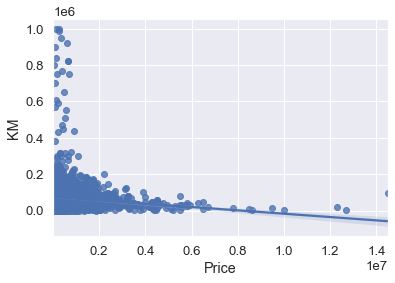

In [420]:
# draw regplot
sns.regplot(x = "Price", 
            y = "KM", 
            data = df)
  
# show the plot
plt.show()

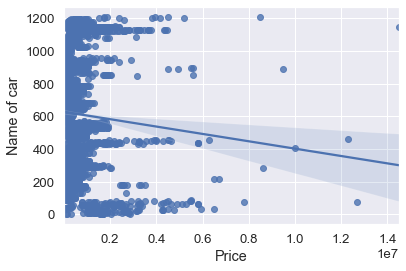

In [421]:
# draw regplot
sns.regplot(y = "Name of car", 
            x = "Price", 
            data = df)
  
# show the plot
plt.show()

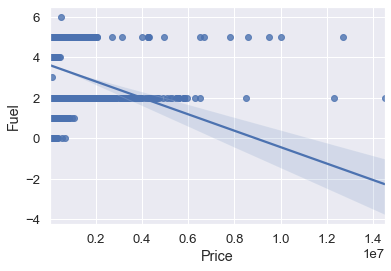

In [422]:
# draw regplot
sns.regplot(y = "Fuel", 
            x = "Price", 
            data = df)
  
# show the plot
plt.show()

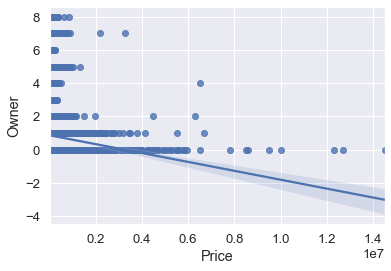

In [423]:
# draw regplot
sns.regplot(y = "Owner", 
            x = "Price", 
            data = df)
  
# show the plot
plt.show()

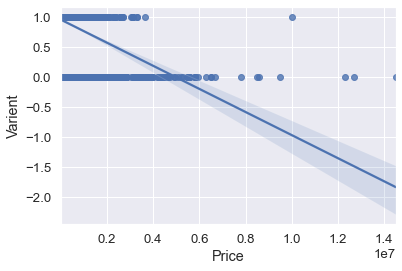

In [424]:
# draw regplot
sns.regplot(y = "Varient", 
            x = "Price", 
            data = df)
  
# show the plot
plt.show()

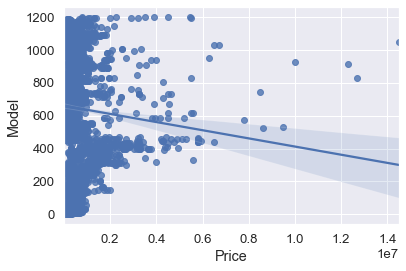

In [425]:
# draw regplot
sns.regplot(y = "Model", 
            x = "Price", 
            data = df)
  
# show the plot
plt.show()

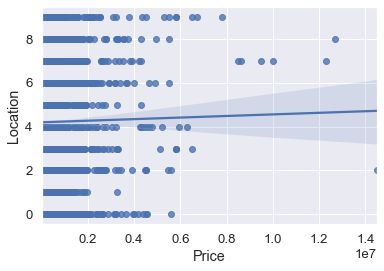

In [426]:
# draw regplot
sns.regplot(y = "Location", 
            x = "Price", 
            data = df)
  
# show the plot
plt.show()

Observations:
    
    1. All these cars are used and comes to re-sales,hence all the columns are making price lower or value of car is depriciated by time and model.

# CORRELATION BETWEEN THE COLUMNS:

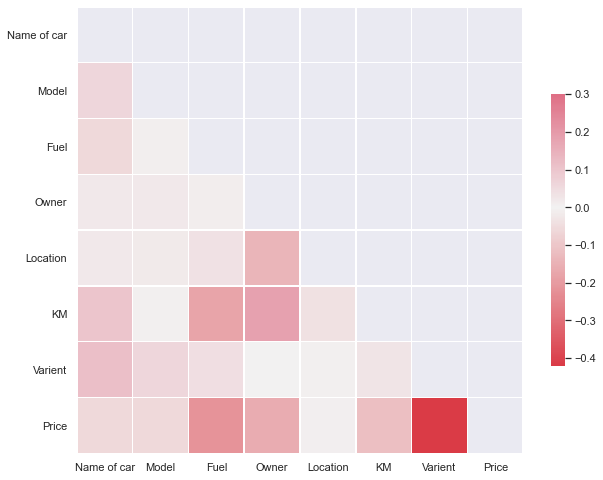

In [427]:
import matplotlib.pyplot as plt
import numpy as np
correlations = df.corr()
sns.set(style='dark')
cmap = sns.diverging_palette(10, 5, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<AxesSubplot:>

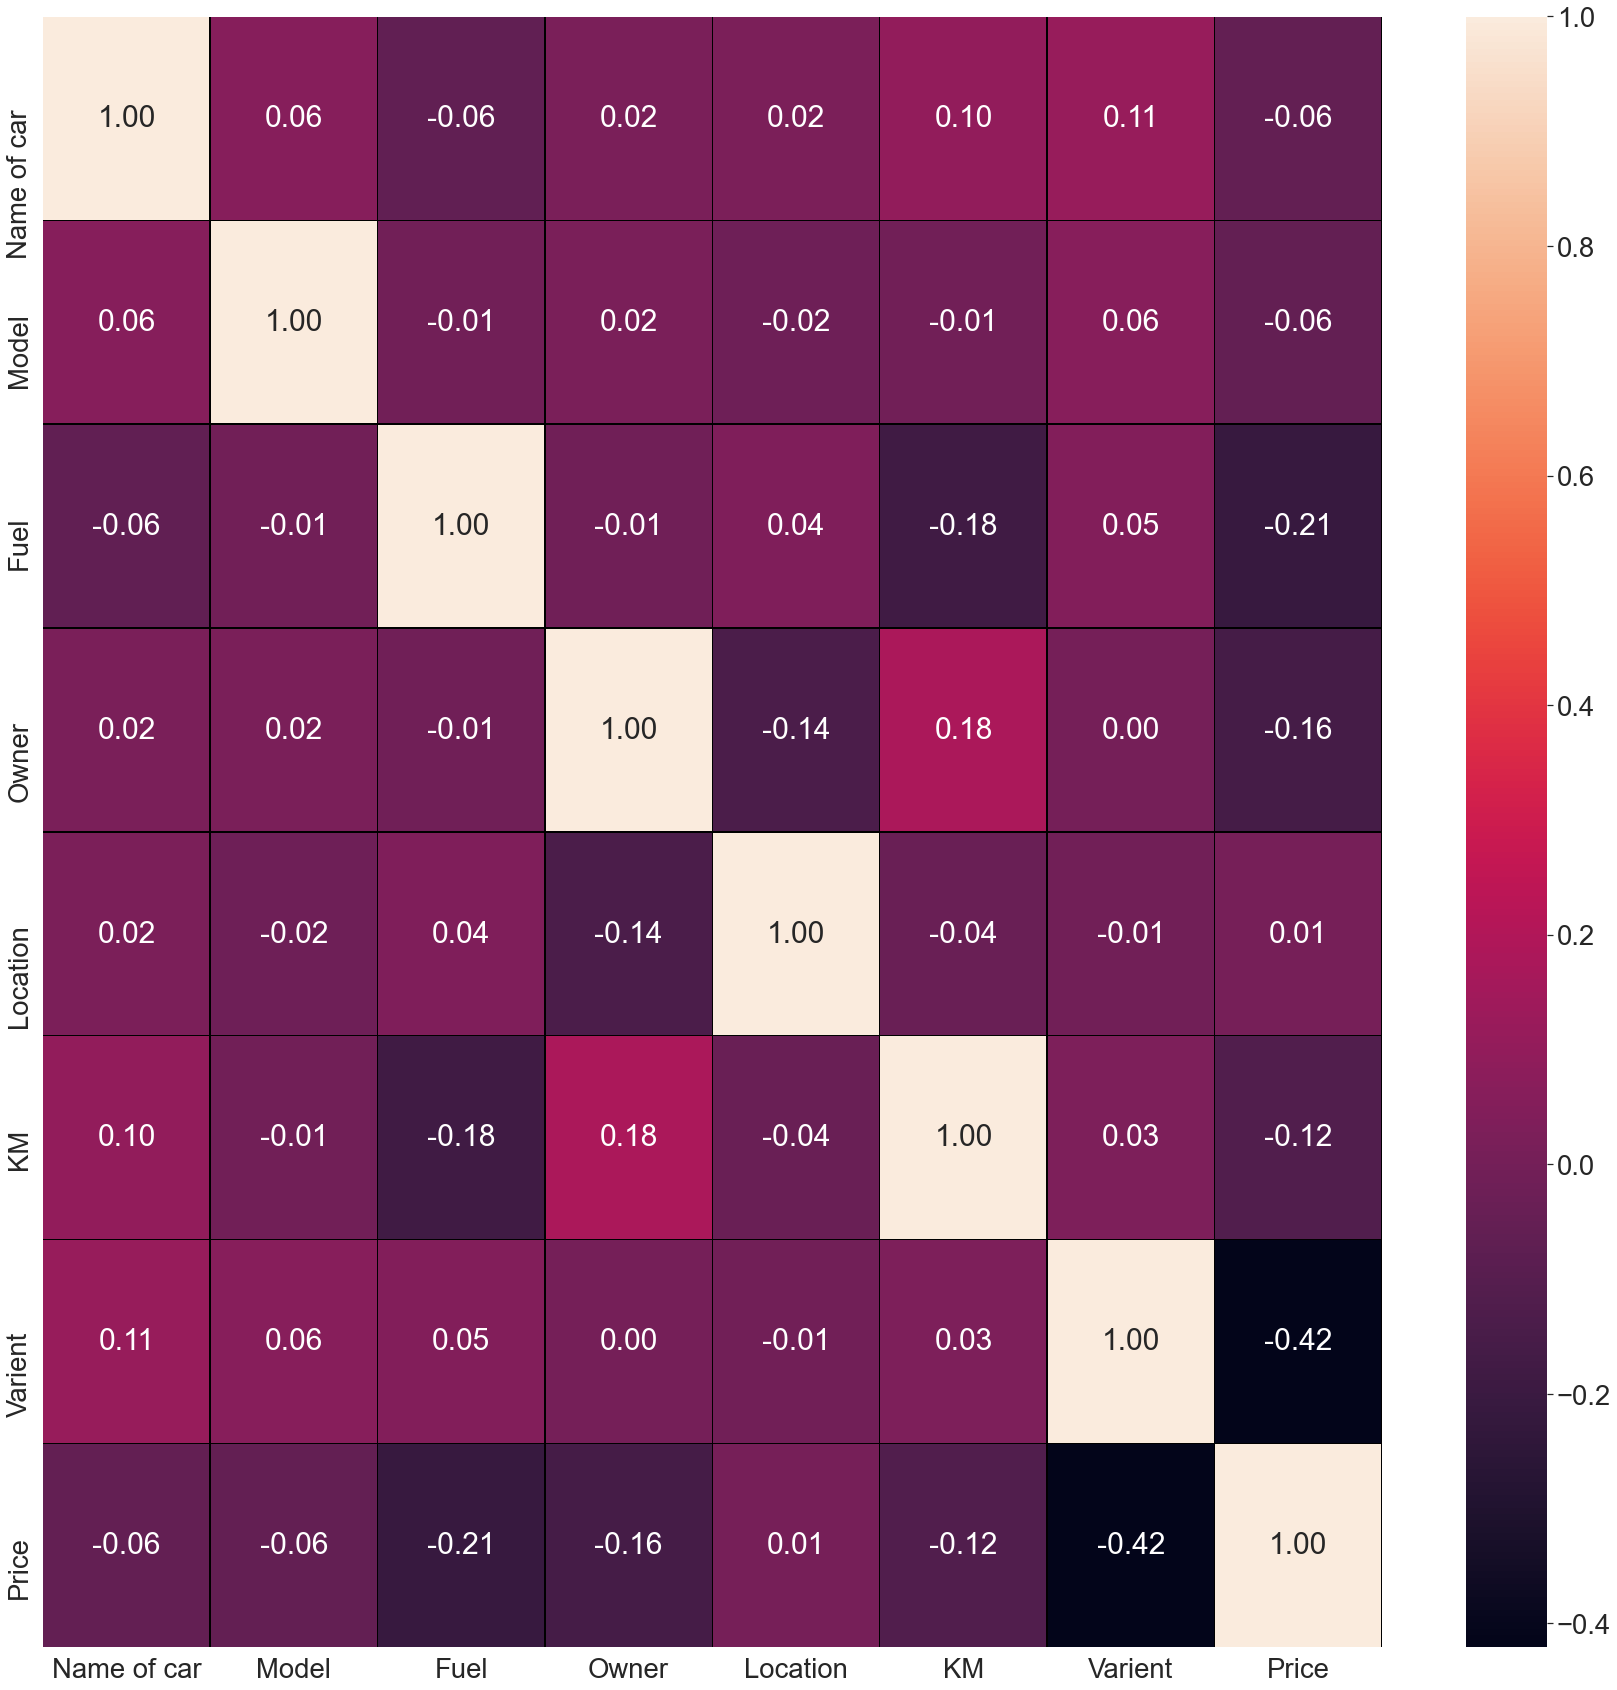

In [428]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.set(font_scale=2.5)
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

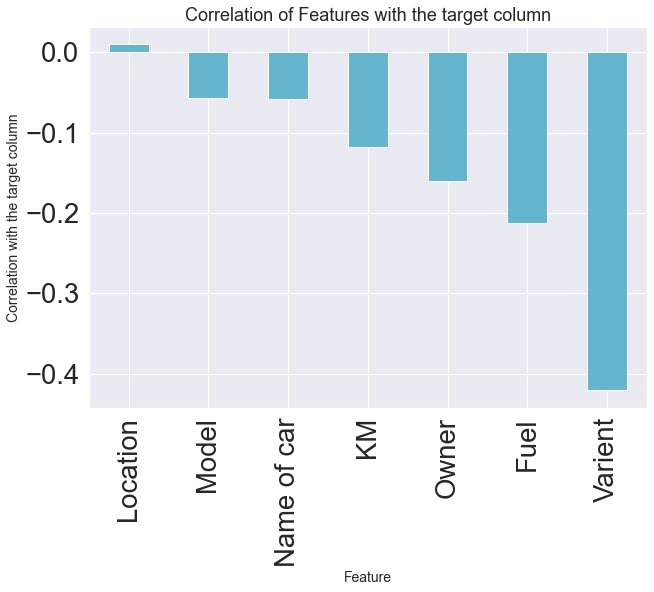

In [429]:
plt.figure(figsize=(10,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
sns.set(font_scale=1)
plt.show()


Observations:
    
    1. All the columns are negatively correlated with Price column except location.
    
    2. hence no feature column is increasing the price of the car.

# Discription of dataset

In [430]:
df.describe()

Name of car        Model         Fuel        Owner     Location  \
count  4488.000000  4488.000000  4488.000000  4488.000000  4488.000000   
mean    614.174911   644.615419     3.366756     0.706996     4.216355   
std     314.124378   355.880380     1.545125     1.354791     3.039042   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     348.000000   336.750000     2.000000     0.000000     1.000000   
50%     629.000000   718.500000     2.000000     0.000000     4.000000   
75%     805.000000   972.000000     5.000000     1.000000     7.000000   
max    1210.000000  1200.000000     6.000000     8.000000     9.000000   

                  KM      Varient         Price  
count    4488.000000  4488.000000  4.488000e+03  
mean    68982.184492     0.835116  6.153149e+05  
std     63212.460737     0.371117  8.106784e+05  
min         0.000000     0.000000  1.500000e+04  
25%     40000.000000     1.000000  2.350000e+05  
50%     62000.000000     1.000000  3.990000e+05  
75%     84000.000000     1.000000  6.800000e+05  
max    999999.000000     1.000000  1.450000e+07

observations:
    
    1. There is difference in 75% and max which means outliers are present.
    

# Feature Engineering

Let's take a look at the distribution of the SalePrice.

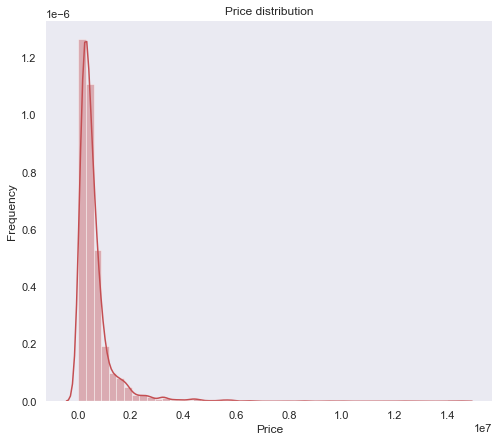

In [431]:
sns.set_style("dark")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df['Price'], color="r");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Price")
ax.set(title="Price distribution")
sns.despine(trim=True, left=True)
plt.show()

In [432]:
# Skew and kurt
print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

Skewness: 6.050985
Kurtosis: 61.460897


The Price is skewed to the right. This is a problem because most ML models don't do well with non-normally distributed data.

In [433]:
# log(1+x) transform
df["Price"] = np.log1p(df["Price"])


 mu = 12.91 and sigma = 0.89



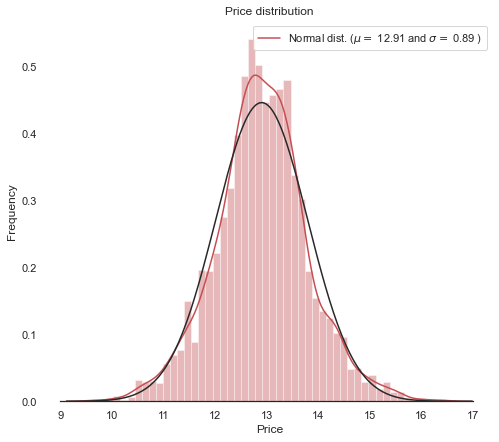

In [434]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df['Price'] , fit=norm, color="r");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Price")
ax.set(title="Price distribution")
sns.despine(trim=True, left=True)

plt.show()

Observations:
    
    1. As we see clearly our price attribute is now normally distributed.

In [435]:
df.shape

(4488, 8)

# Cheak the skewness:

Now use subplot and displot to check data are normalised or not.

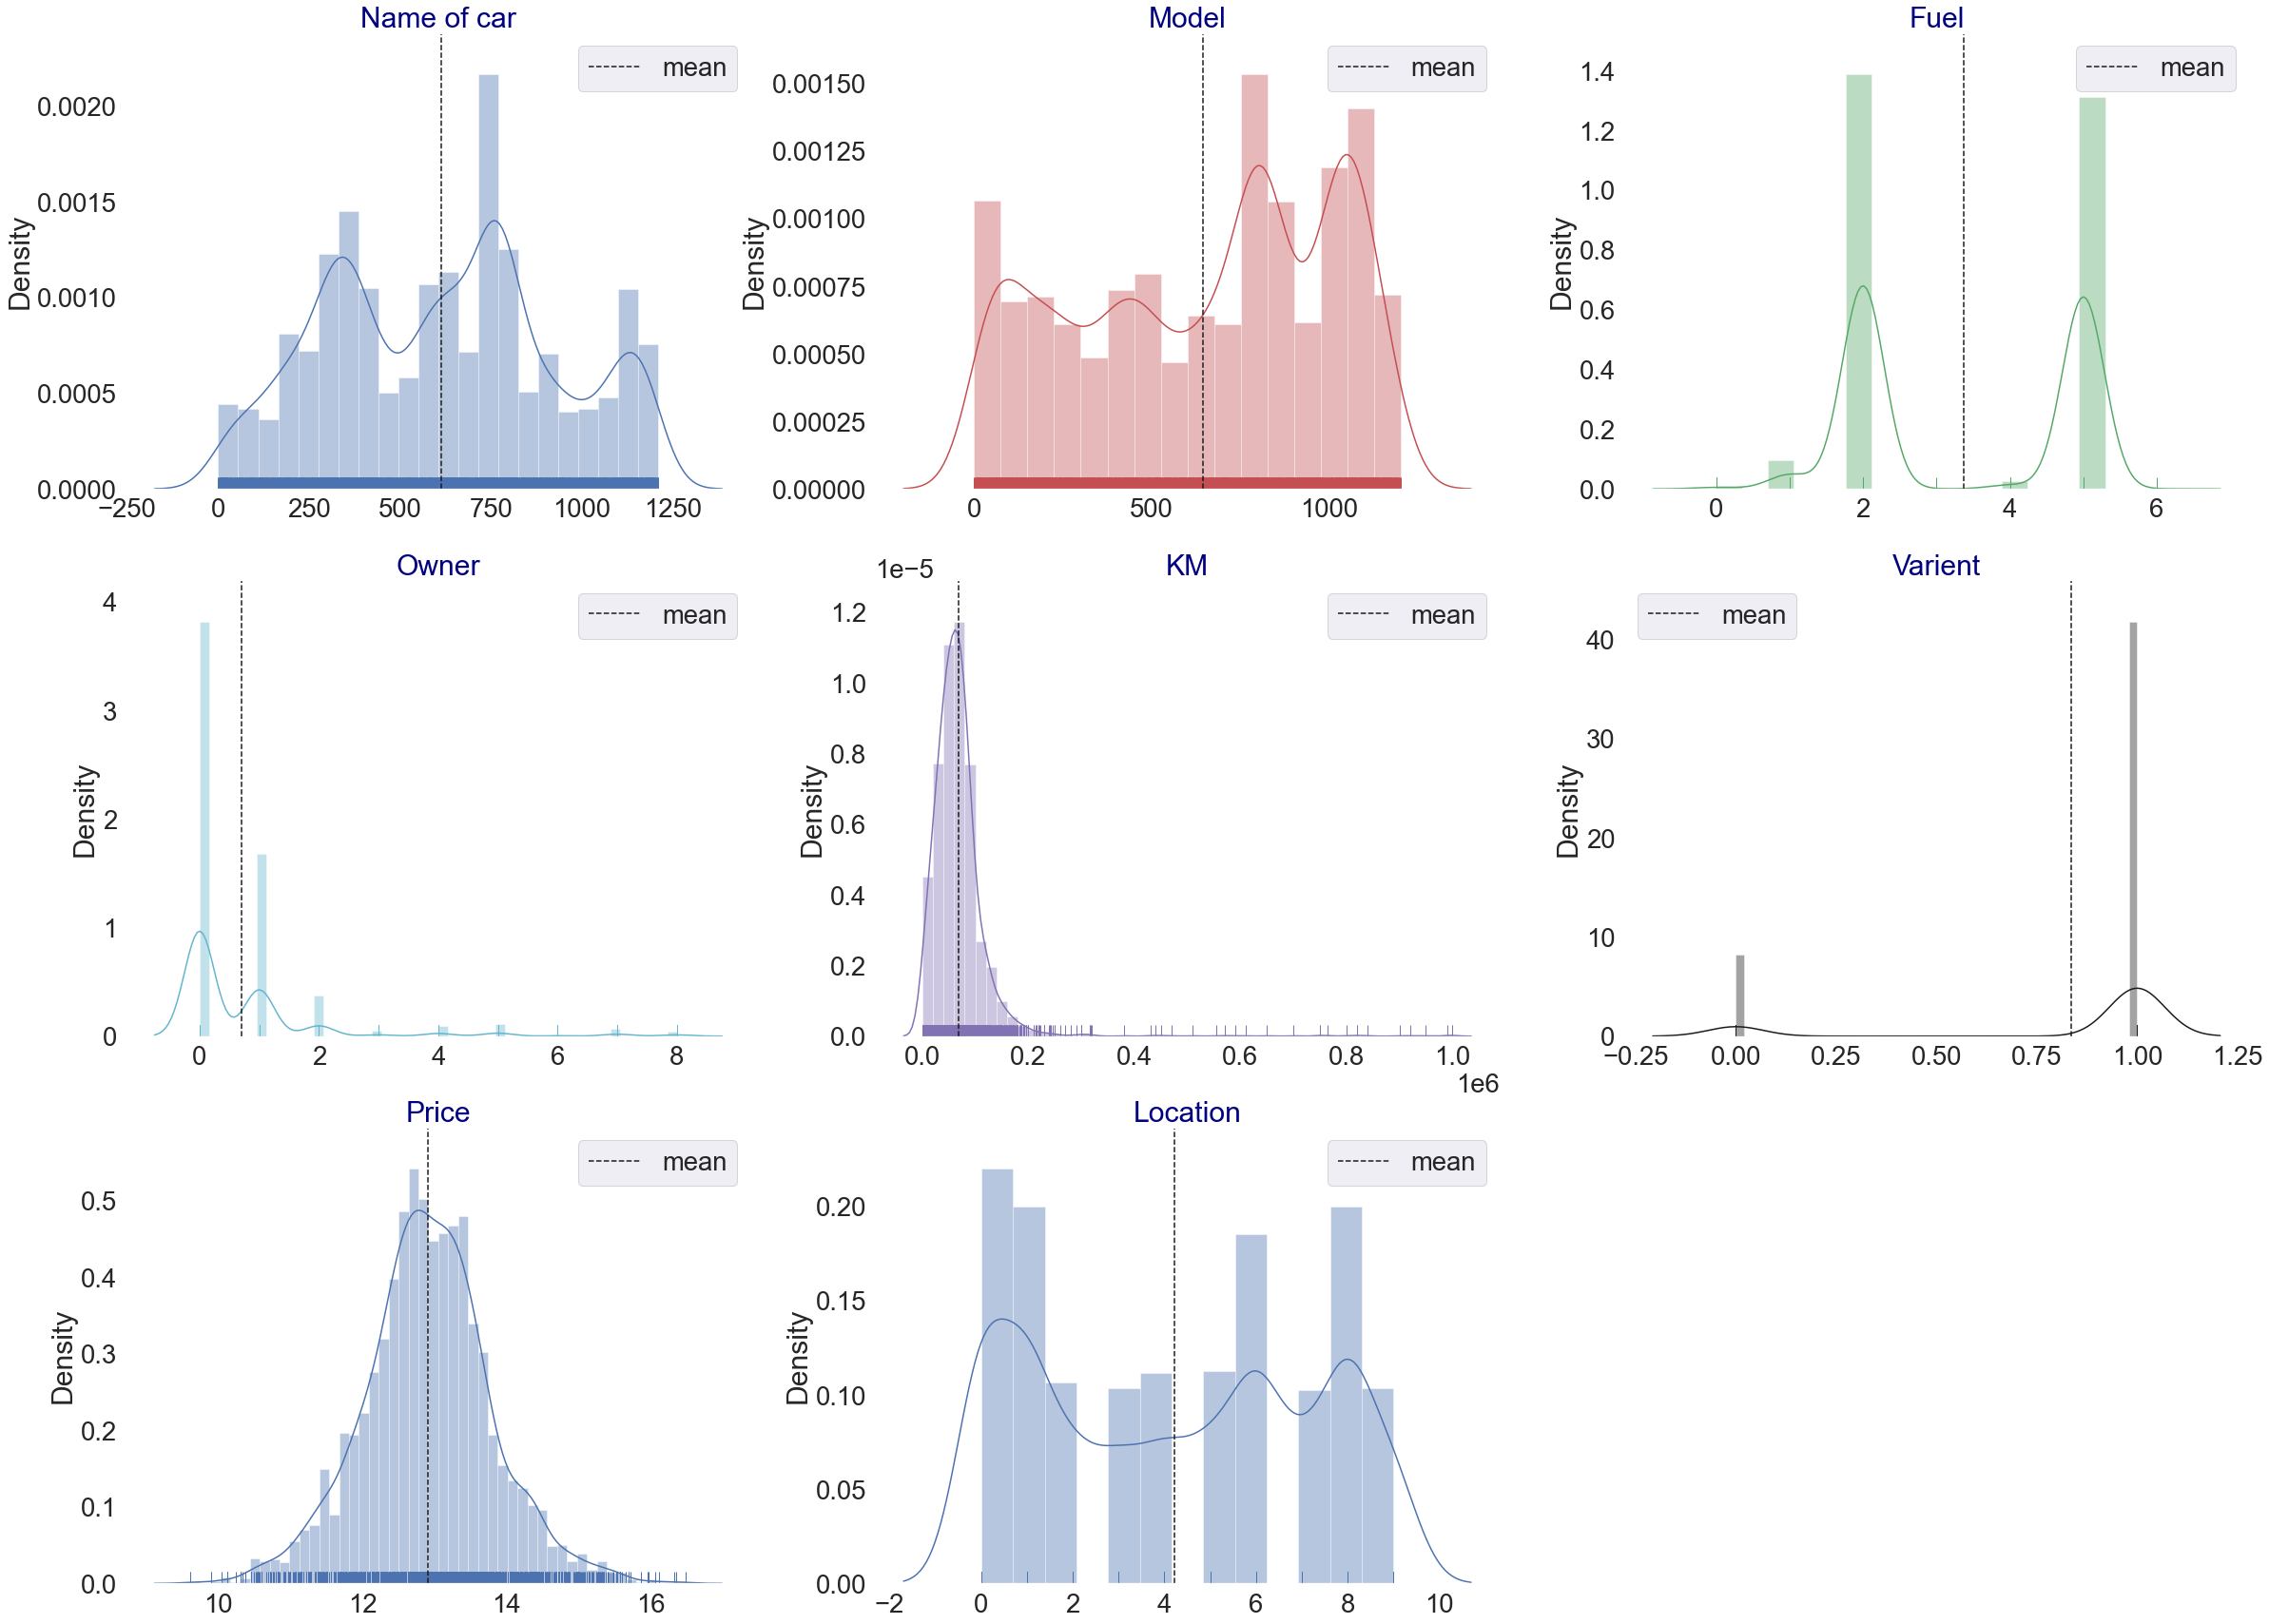

In [436]:
import itertools
import matplotlib.pyplot as plt
cols = ['Name of car', 'Model', 'Fuel', 'Owner', 'KM', 'Varient', 'Price','Location']
length = len(cols)
cs = ["b","r","g","c","m","k","b"]
sns.set(font_scale=2.5)
fig = plt.figure(figsize=(40,30))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(3,3,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    sns.set(font_scale=2.5)
    plt.xlabel("")

# observations:

From above plotting of distribution plot we see that some features columns are not normally distributed.

some columns are skewed towards right.

Building blocks are out of the normal curve hence outliers are present.

In [437]:
df.skew()

Name of car    0.076280
Model         -0.285067
Fuel           0.049332
Owner          3.137108
Location       0.025132
KM             7.554811
Varient       -1.806789
Price          0.068235
dtype: float64

# Detecting outliers:

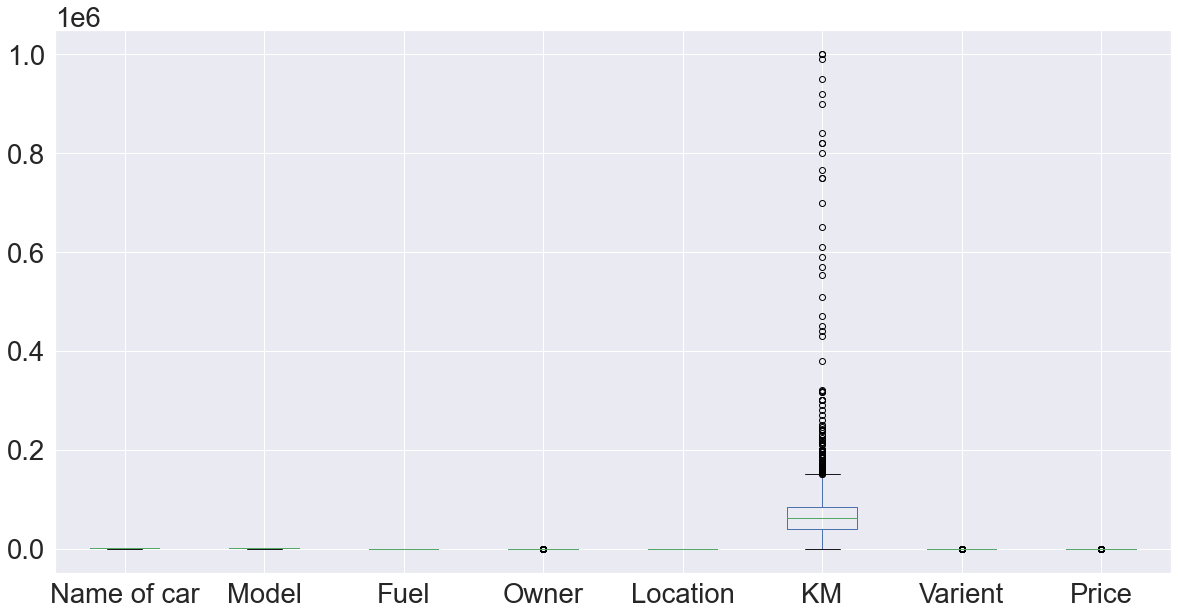

In [438]:
df.plot.box(figsize=(20,10))
sns.set(font_scale=1)

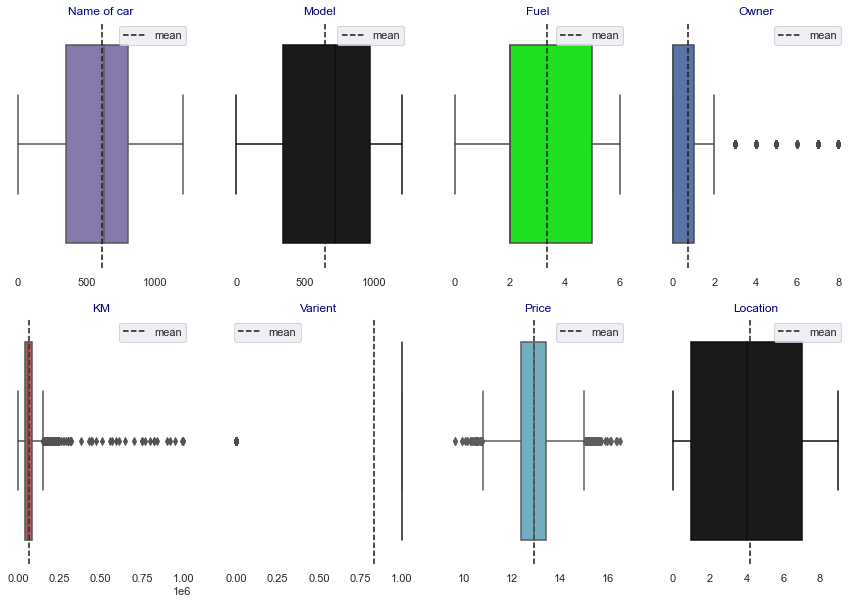

In [439]:
import itertools
import matplotlib.pyplot as plt
cols = ['Name of car', 'Model', 'Fuel', 'Owner', 'KM', 'Varient', 'Price','Location']
length = len(cols)
cs = ["m","k",'lime',"b","r","g","c",'k']
fig = plt.figure(figsize=(15,10))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,4,j+1)
    ax = sns.boxplot(df[i],color=k)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

Observations:
    
    1. From above plotting we see that outliers are present in the dataset.
    
    2. Most outliers are present in KM and Price column.

# Check the percentage of data falls under outliers:

In [440]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 140,  282,  575,  578,  592,  594,  605,  616,  617,  621,  623,
         627,  628,  632,  635,  650,  658,  660,  686,  690,  694,  722,
         732,  737,  743,  748,  749,  750,  752,  757,  762,  765,  768,
         769,  776,  781,  784,  786,  796,  802,  807,  814,  823,  827,
         828,  835,  837,  839,  843,  845,  854,  855,  869,  871,  875,
         883,  892,  895,  897,  900,  937,  962,  962,  974,  995, 1000,
        1008, 1009, 1010, 1021, 1023, 1034, 1040, 1043, 1043, 1054, 1055,
        1057, 1060, 1060, 1063, 1064, 1073, 1086, 1088, 1094, 1097, 1098,
        1099, 1103, 1104, 1106, 1143, 1184, 1207, 1243, 1252, 1269, 1275,
        1281, 1430, 1432, 1458, 1516, 1518, 1614, 1618, 1628, 1635, 1719,
        1755, 1822, 1833, 1965, 1988, 1997, 2018, 2069, 2111, 2199, 2355,
        2540, 2574, 2578, 2608, 2812, 2843, 2849, 2861, 2862, 2873, 2874,
        2885, 2886, 2900, 2911, 2926, 2927, 2941, 2950, 2951, 2962, 2990,
        2999, 3004, 3005, 3018, 3034, 

In [441]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(4263, 8)

In [442]:
df.shape

(4488, 8)

In [443]:
percentage_loss=((4488-4263)/3867)*100
print(percentage_loss)

5.818463925523662


 hence Data loss is more then 5.8% we proceed with outliers removal.

# Split the dataset in input columns and target columns..

In [444]:
x=df_new.drop("Price",axis=1)
y=df_new['Price']

# Removing skewness by transforming data.

In [445]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.54169416, -1.56588137,  1.04482482, ...,  0.62199439,
         1.14729999,  0.43944855],
       [ 0.10381259,  0.43520791,  1.04482482, ...,  0.62199439,
        -1.19461968,  0.43944855],
       [-1.83714047,  0.38847229,  1.04482482, ...,  0.62199439,
         0.24164855,  0.43944855],
       ...,
       [-1.15177544,  1.01853363,  1.04482482, ...,  0.33866538,
        -1.36603284, -2.27557924],
       [ 0.58703574,  1.05329954, -0.85860584, ...,  0.33866538,
        -0.41985071,  0.43944855],
       [ 1.45140913, -1.42204698, -0.85860584, ...,  0.33866538,
         0.76228737,  0.43944855]])

In [446]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.54169416, -1.56588137,  1.04482482, ...,  0.62199439,
         1.14729999,  0.43944855],
       [ 0.10381259,  0.43520791,  1.04482482, ...,  0.62199439,
        -1.19461968,  0.43944855],
       [-1.83714047,  0.38847229,  1.04482482, ...,  0.62199439,
         0.24164855,  0.43944855],
       ...,
       [-1.15177544,  1.01853363,  1.04482482, ...,  0.33866538,
        -1.36603284, -2.27557924],
       [ 0.58703574,  1.05329954, -0.85860584, ...,  0.33866538,
        -0.41985071,  0.43944855],
       [ 1.45140913, -1.42204698, -0.85860584, ...,  0.33866538,
         0.76228737,  0.43944855]])

# 4. Model Building

 Since the column has binary variable we will use linear Regression

# Regression Model Building:


# Start with Linear Regression:

In [447]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [450]:
max_scr=0
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    #if round(r2_score(ytrain,pred_train)*100,2)==round(r2_score(ytest,pred_test)*100,2):
    print("At random state",i," The model performs very well")
    print("At random_state:-",i)
    print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
    print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

At random state 0  The model performs very well
At random_state:- 0
Training r2_score is:- 38.36548141921041
Testing r2_score is:- 37.30380427173735
At random state 1  The model performs very well
At random_state:- 1
Training r2_score is:- 37.9070766250598
Testing r2_score is:- 39.08964088649485
At random state 2  The model performs very well
At random_state:- 2
Training r2_score is:- 37.785774607291586
Testing r2_score is:- 39.51905996421258
At random state 3  The model performs very well
At random_state:- 3
Training r2_score is:- 38.42230618901708
Testing r2_score is:- 37.070545820441325
At random state 4  The model performs very well
At random_state:- 4
Training r2_score is:- 38.99332331159653
Testing r2_score is:- 35.082883415459285
At random state 5  The model performs very well
At random_state:- 5
Training r2_score is:- 37.86375530467958
Testing r2_score is:- 38.82257763205743
At random state 6  The model performs very well
At random_state:- 6
Training r2_score is:- 39.3477162126

In [451]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=31)

In [452]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

pred_test=lr.predict(xtest)

from sklearn.metrics import accuracy_score
r2_score(ytest,pred_test)


0.42306525900049785

In [453]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [454]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [455]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_test))
print('Mean Squared Error:',mean_squared_error(ytest,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_test)))

Error:
Mean Absolute Error: 0.506021123245631
Mean Squared Error: 0.4166678394613159
Root Mean Square Error: 0.6454981328100926


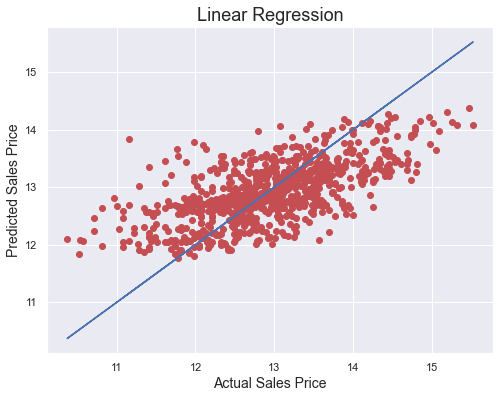

In [456]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_test, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regurlarization
As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

# 1. Lasso

In [457]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10)),'selection':['cyclic', 'random']}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 3, 'selection': 'random'}


In [458]:
ls = Lasso(alpha=.01,random_state=3,selection='random')
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)
pred_ls = ls.predict(xtest)

lss = r2_score(ytest,pred_ls)
for j in range(2,13):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 34.31186090855329
R2_score is :- 42.06893076535947


At cv:- 3
Cross validation score is:- 29.588831270763112
R2_score is :- 42.06893076535947


At cv:- 4
Cross validation score is:- 33.51240681926721
R2_score is :- 42.06893076535947


At cv:- 5
Cross validation score is:- 33.62643909298825
R2_score is :- 42.06893076535947


At cv:- 6
Cross validation score is:- 33.8207716723263
R2_score is :- 42.06893076535947


At cv:- 7
Cross validation score is:- 33.03395970727791
R2_score is :- 42.06893076535947


At cv:- 8
Cross validation score is:- 32.52156982099861
R2_score is :- 42.06893076535947


At cv:- 9
Cross validation score is:- 34.170107932659874
R2_score is :- 42.06893076535947


At cv:- 10
Cross validation score is:- 33.8988174637498
R2_score is :- 42.06893076535947


At cv:- 11
Cross validation score is:- 33.584556993368686
R2_score is :- 42.06893076535947


At cv:- 12
Cross validation score is:- 33.52784308402321
R2_score is :- 42.068930765359

In [459]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ls))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ls)))

Error:
Mean Absolute Error: 0.5077915905649268
Mean Squared Error: 0.41838377446059205
Root Mean Square Error: 0.6468259228421447


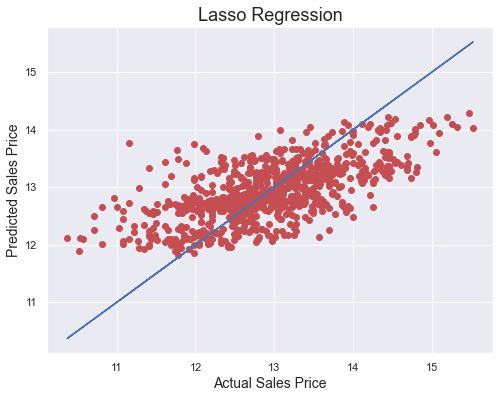

In [460]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ls, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge

In [462]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [463]:
rd = Ridge(alpha=0.01, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)
pred_rd = rd.predict(xtest)
rds = r2_score(ytest,pred_rd)
for j in range(2,13):
    rds = r2_score(ytest,pred_rd)
    print("At cv:-",j)
    rdscore = cross_val_score(rd,x,y,cv=j)
    rdc = rdscore.mean() 
    print('Cross Val Score:',rdc*100)
    
   
    print('R2 Score:',rds*100)


At cv:- 2
Cross Val Score: 33.73205345765595
R2 Score: 42.25130842297562
At cv:- 3
Cross Val Score: 28.73574134744972
R2 Score: 42.25130842297562
At cv:- 4
Cross Val Score: 33.58292777665757
R2 Score: 42.25130842297562
At cv:- 5
Cross Val Score: 33.29148007804242
R2 Score: 42.25130842297562
At cv:- 6
Cross Val Score: 34.006571213232014
R2 Score: 42.25130842297562
At cv:- 7
Cross Val Score: 33.25994583503561
R2 Score: 42.25130842297562
At cv:- 8
Cross Val Score: 32.71146529188777
R2 Score: 42.25130842297562
At cv:- 9
Cross Val Score: 34.32348985481328
R2 Score: 42.25130842297562
At cv:- 10
Cross Val Score: 34.09083568790876
R2 Score: 42.25130842297562
At cv:- 11
Cross Val Score: 33.74806199112278
R2 Score: 42.25130842297562
At cv:- 12
Cross Val Score: 33.667226257187885
R2 Score: 42.25130842297562


In [464]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rd)))

Error:
Mean Absolute Error: 0.5063691375167334
Mean Squared Error: 0.4170666254112336
Root Mean Square Error: 0.6458069567689974


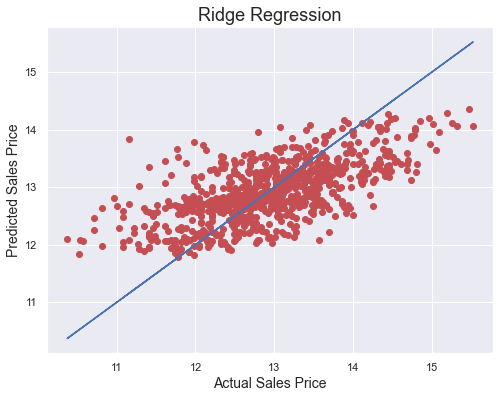

In [465]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()


# Decision Tree Regressor

In [466]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'auto', 'splitter': 'best'}


In [467]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='best',max_features= 'auto')
dt.fit(xtrain,ytrain)
dt.score(xtrain,ytrain)
pred_decision = dt.predict(xtest)

dts = r2_score(ytest,pred_decision)
for j in range(2,13):
    print("At cv:-",j)
    dts = r2_score(ytest,pred_decision)
    print('R2 Score:',dts*100)

    dtscore = cross_val_score(dt,x,y,cv=j)
    dtc = dtscore.mean() 
    print('Cross Val Score:',dtc*100)

At cv:- 2
R2 Score: 51.6826962870226
Cross Val Score: 37.09765971829087
At cv:- 3
R2 Score: 51.6826962870226
Cross Val Score: 34.94869206635503
At cv:- 4
R2 Score: 51.6826962870226
Cross Val Score: 40.70107708135282
At cv:- 5
R2 Score: 51.6826962870226
Cross Val Score: 42.042557725457044
At cv:- 6
R2 Score: 51.6826962870226
Cross Val Score: 42.44144129234315
At cv:- 7
R2 Score: 51.6826962870226
Cross Val Score: 46.07959986691359
At cv:- 8
R2 Score: 51.6826962870226
Cross Val Score: 44.52919218373361
At cv:- 9
R2 Score: 51.6826962870226
Cross Val Score: 43.36664694922824
At cv:- 10
R2 Score: 51.6826962870226
Cross Val Score: 47.07389157084492
At cv:- 11
R2 Score: 51.6826962870226
Cross Val Score: 44.25072895453957
At cv:- 12
R2 Score: 51.6826962870226
Cross Val Score: 44.63614813186459


In [468]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_decision))
print('Mean Squared Error:',mean_squared_error(ytest,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_decision)))


Error:
Mean Absolute Error: 0.3886769861357483
Mean Squared Error: 0.34895223178629625
Root Mean Square Error: 0.5907217888196576


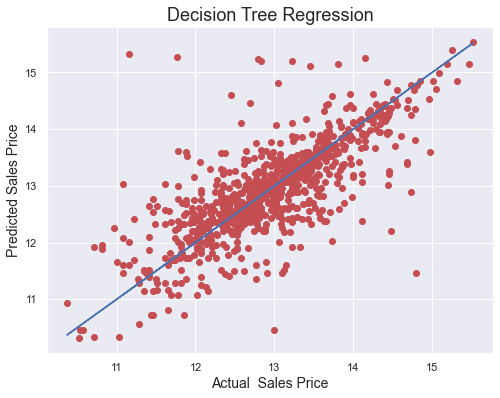

In [469]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_decision, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual  Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

# Ensemble methods

# Gradient Boosting Regressor

In [470]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 200}


In [472]:
gbr= GradientBoostingRegressor(criterion='mse',loss='ls',n_estimators=200)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_gradient = gbr.predict(xtest)

for j in range(2,18):
    print("At cv:-",j)

    gbrs= r2_score(ytest,pred_gradient)
    print('R2 Score:',gbrs*100)

    gbscore = cross_val_score(gbr,x,y,cv=j)
    gbrc= gbscore.mean() 
    print('Cross Val Score:',gbrc*100)

At cv:- 2
R2 Score: 77.94710770113188
Cross Val Score: 69.41576484935624
At cv:- 3
R2 Score: 77.94710770113188
Cross Val Score: 68.48669229070676
At cv:- 4
R2 Score: 77.94710770113188
Cross Val Score: 71.05217148030263
At cv:- 5
R2 Score: 77.94710770113188
Cross Val Score: 72.3906524614248
At cv:- 6
R2 Score: 77.94710770113188
Cross Val Score: 72.27796904171635
At cv:- 7
R2 Score: 77.94710770113188
Cross Val Score: 71.82541197465939
At cv:- 8
R2 Score: 77.94710770113188
Cross Val Score: 72.35552373362314
At cv:- 9
R2 Score: 77.94710770113188
Cross Val Score: 73.91172715808297
At cv:- 10
R2 Score: 77.94710770113188
Cross Val Score: 74.1715074669425
At cv:- 11
R2 Score: 77.94710770113188
Cross Val Score: 73.37753784452352
At cv:- 12
R2 Score: 77.94710770113188
Cross Val Score: 73.7465099844135
At cv:- 13
R2 Score: 77.94710770113188
Cross Val Score: 74.15470299457596
At cv:- 14
R2 Score: 77.94710770113188
Cross Val Score: 74.23029489700474
At cv:- 15
R2 Score: 77.94710770113188
Cross Val 

In [473]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_gradient))
print('Mean Squared Error:',mean_squared_error(ytest,pred_gradient))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_gradient)))


Error:
Mean Absolute Error: 0.3042005850970897
Mean Squared Error: 0.1592681170858872
Root Mean Square Error: 0.3990840977612202


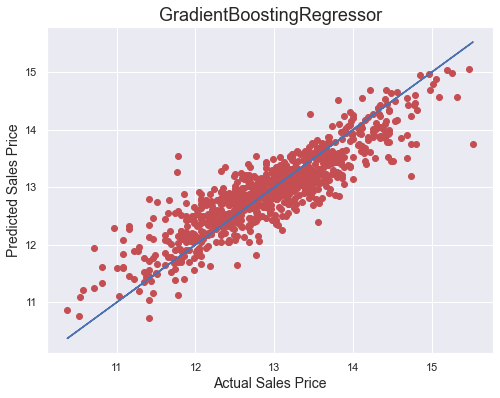

In [474]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_gradient, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

# RandomForestRegressor

In [475]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'log2', 'n_estimators': 300}


In [478]:
rf = RandomForestRegressor(criterion='friedman_mse',n_estimators=300, max_features= 'log2')
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_random = rf.predict(xtest)
rfs = r2_score(ytest,pred_random)
for j in range(2,5):
    print("At cv:-",j)

    rfs = r2_score(ytest,pred_random)
    print('R2 Score:',rfs*100)

    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print('Cross Val Score:',rfc*100)

At cv:- 2
R2 Score: 75.2257499322031
Cross Val Score: 63.66694100175866
At cv:- 3
R2 Score: 75.2257499322031
Cross Val Score: 62.46779833693452
At cv:- 4
R2 Score: 75.2257499322031
Cross Val Score: 66.56365648003803


In [479]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_random))
print('Mean Squared Error:',mean_squared_error(ytest,pred_random))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_random)))


Error:
Mean Absolute Error: 0.3127409029885696
Mean Squared Error: 0.17892202560275702
Root Mean Square Error: 0.42299175595129157


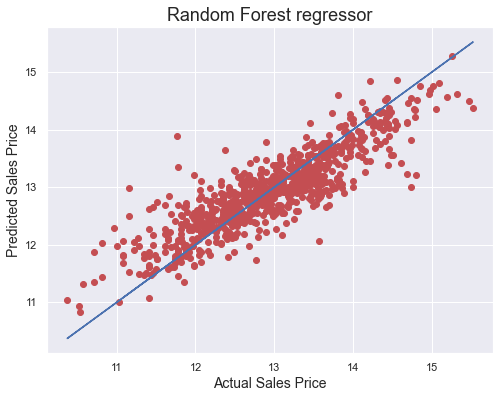

In [480]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

# Support vector Regression

In [481]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid'] ,'gamma': ['auto', 'scale'],'cache_size':[50,100,200,300]}
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'cache_size': 50, 'gamma': 'auto', 'kernel': 'rbf'}


In [482]:
sv = SVR(kernel = 'rbf', gamma = 'auto',cache_size= 50)
sv.fit(xtrain,ytrain)
sv.score(xtrain,ytrain)
pred_vector = sv.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)


    svs = r2_score(ytest,pred_vector)
    print('R2 Score:',svs*100)

    svscore = cross_val_score(sv,x,y,cv=j)
    svc = svscore.mean() 
    print('Cross Val Score:',svc*100)

At cv:- 2
R2 Score: 59.92285826421071
Cross Val Score: 46.32812924683509
At cv:- 3
R2 Score: 59.92285826421071
Cross Val Score: 40.49208697518905
At cv:- 4
R2 Score: 59.92285826421071
Cross Val Score: 47.925033346436244
At cv:- 5
R2 Score: 59.92285826421071
Cross Val Score: 47.998811737742194
At cv:- 6
R2 Score: 59.92285826421071
Cross Val Score: 48.653180572898755
At cv:- 7
R2 Score: 59.92285826421071
Cross Val Score: 48.307148461659466
At cv:- 8
R2 Score: 59.92285826421071
Cross Val Score: 48.58990037457836
At cv:- 9
R2 Score: 59.92285826421071
Cross Val Score: 50.46677681806874


In [483]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_gradient))
print('Mean Squared Error:',mean_squared_error(ytest,pred_gradient))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_gradient)))


Error:
Mean Absolute Error: 0.3042005850970897
Mean Squared Error: 0.1592681170858872
Root Mean Square Error: 0.3990840977612202


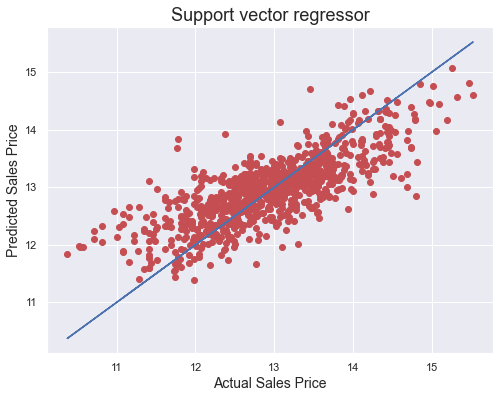

In [485]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_vector, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


# KNeighborsRegressor

In [491]:
from sklearn.neighbors import KNeighborsRegressor

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}


In [486]:
kn = KNeighborsRegressor(algorithm = 'auto', weights = 'distance',n_neighbors=10)
kn.fit(xtrain,ytrain)
kn.score(xtrain,ytrain)
pred_k = kn.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)


    kns = r2_score(ytest,pred_k)
    print('R2 Score:',kns*100)

    knscore = cross_val_score(kn,x,y,cv=j)
    kvc = knscore.mean() 
    print('Cross Val Score:',kvc*2)

At cv:- 2
R2 Score: 61.099298306112026
Cross Val Score: 0.9115868692690436
At cv:- 3
R2 Score: 61.099298306112026
Cross Val Score: 0.8476674861766916
At cv:- 4
R2 Score: 61.099298306112026
Cross Val Score: 0.9286970211241632
At cv:- 5
R2 Score: 61.099298306112026
Cross Val Score: 0.9528955256688952
At cv:- 6
R2 Score: 61.099298306112026
Cross Val Score: 0.9607051998959365
At cv:- 7
R2 Score: 61.099298306112026
Cross Val Score: 0.9506246702818818
At cv:- 8
R2 Score: 61.099298306112026
Cross Val Score: 0.9421341941007899
At cv:- 9
R2 Score: 61.099298306112026
Cross Val Score: 1.0161425514700038


In [487]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_k))
print('Mean Squared Error:',mean_squared_error(ytest,pred_k))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_k)))


Error:
Mean Absolute Error: 0.4032125394384933
Mean Squared Error: 0.2809446229610125
Root Mean Square Error: 0.5300420954613063


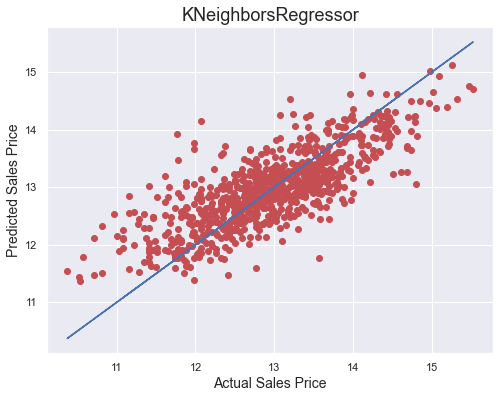

In [488]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_k, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=18)
plt.show()

# 5. Model Evaluation

In [495]:
import numpy as np
a=np.array(ytest)
a

array([14.55506459, 13.17115545, 13.18063417, 13.66468883, 13.12236338,
       11.77529742, 13.3046866 , 12.38839837, 13.00583181, 13.45740745,
       12.32386013, 12.61153775, 12.36734505, 13.49392693, 13.26212706,
       12.99453228, 14.48334044, 12.56024797, 13.07107219, 12.01370681,
       13.45883704, 14.43069674, 13.76421832, 14.05845752, 14.4756184 ,
       13.6351882 , 14.60396837, 13.14216797, 13.10216271, 13.40754382,
       13.27936884, 13.6529928 , 12.83468397, 14.79007058, 14.09314305,
       14.41709109, 13.7375501 , 11.15626481, 12.50618094, 11.60824474,
       12.75130259, 13.20854291, 12.83468397, 12.15478461, 13.27936884,
       12.86100121, 14.55744838, 13.12236538, 13.34550853, 13.17115545,
       14.39772674, 12.18075997, 12.32386013, 12.89922233, 13.38472918,
       12.4292202 , 14.05845752, 13.21767538, 12.87390458, 10.71443999,
       13.45740745, 12.98310361, 12.77987589, 13.03898394, 14.73180169,
       14.79833819, 13.90168917, 13.38472918, 13.27078511, 12.38

In [496]:
predicted=np.array(pred_gradient)
predicted

array([14.17157704, 12.86093406, 12.87486331, 13.1872582 , 13.01636542,
       11.1278719 , 13.02362491, 12.50592896, 12.52057812, 13.28590029,
       12.92103959, 12.13265495, 12.48330227, 12.98256983, 12.8158345 ,
       13.20853494, 13.45619841, 12.65204736, 13.17545297, 12.31891025,
       13.06293508, 14.44792243, 12.86452585, 13.73965091, 14.63398206,
       13.57600085, 13.85969341, 12.50073487, 12.99769478, 13.40559978,
       12.5952485 , 13.01693712, 13.16354417, 14.46425999, 13.62872226,
       14.68726874, 13.5102619 , 12.32453323, 12.97667769, 12.17694596,
       13.00195127, 13.30815286, 12.89611815, 12.16239785, 13.2972319 ,
       12.65165421, 14.64345745, 12.90324857, 13.2120835 , 12.70006712,
       14.09992218, 12.7135476 , 12.91538336, 12.45630271, 12.93390002,
       12.71876661, 14.02562687, 12.75895125, 12.94687856, 11.25514007,
       13.15115117, 13.15353015, 12.57050031, 13.351453  , 13.19767686,
       13.75227699, 14.00080191, 13.63608005, 12.70929674, 12.42

In [497]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [498]:
df_com.sample(20)

original  predicted
50   14.397727  14.099922
829  11.918397  12.447489
313  13.547632  13.272227
428  12.834684  13.065019
183  12.429220  12.544912
642  12.594734  12.778789
631  12.660331  13.099392
399  12.429220  12.884265
112  14.457365  13.995727
422  12.691584  13.031833
440  10.819798  11.622741
537  13.610945  13.756402
364  12.959847  12.855794
488  13.345509  12.744517
457  13.878486  13.063272
699  11.976666  11.765678
48   13.345509  13.212084
103  12.676079  13.213415
733  12.611541  12.643486
727  12.201065  12.519557

The best model is Gradient Bossting Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum

# 6. Selecting the best model

We tested 8 models out of which Gradient Bossting Regressor performing Best as Accuracy score and CV is Optimum.

The best model is Gradient Bossting Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

# At cv:- 17
# R2 Score: 77.94710770113188
# Cross Val Score: 74.3798966811026

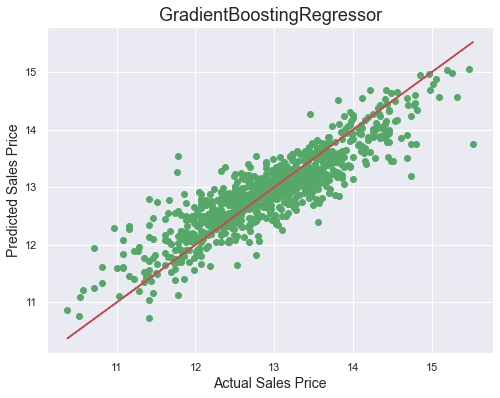

In [503]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_gradient, color='g')
plt.plot(ytest,ytest, color='r')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

# Saving the best model using pickle library.

In [500]:
import pickle
filename = 'Car_Resales_Pridiction.pkl'
pickle.dump(gbr, open(filename, 'wb'))